# Regresión Logistica Binomial

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

https://scikit-learn.org/stable/modules/linear_model.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Total Charges debería ser numerico, pero por alguna razón se miestran como objetos. Los errores los ignora y transforma el resto a tipo numerico
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [6]:
# revisamos si existen valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Al transformar a numericos y no tomar en cuenta los errores, estos quedan sin datos.

Debido a que son solo 11 datos de 7 mil, se opta por eliminarlos.

In [7]:
df.dropna(inplace = True)

In [8]:
#elimininamos la variable CustomerID ya que no me aporta al modelo debido a que es un dato incremental solo para identificar el campo
df.drop(columns = 'customerID', axis = 1, inplace = True)

* La variable a predecir "Churn" por defecto está como texto ya que contiene un "Yes" o "No".
* Como sabemos los algoritmos son mas amigables con datos numericos por lo que reemplazaremos los datos para que queden como numericos

In [9]:
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

In [10]:
# Copiamos el df para poder modificar con mayor libertad el dataframe
df2 = df.copy()

In [11]:
df2 = pd.get_dummies(data = df2)

# Análisis de correlación

Debido a que tengo muchas variables, una correlación de todas no se va a visualizar de buena forma. Es por esto que elegimos la correlación hacia "Churn"

In [12]:
df2.corr()['Churn'].sort_values(ascending = True)

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
OnlineSecurity_No internet service        -0.227578
OnlineBackup_No internet service          -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

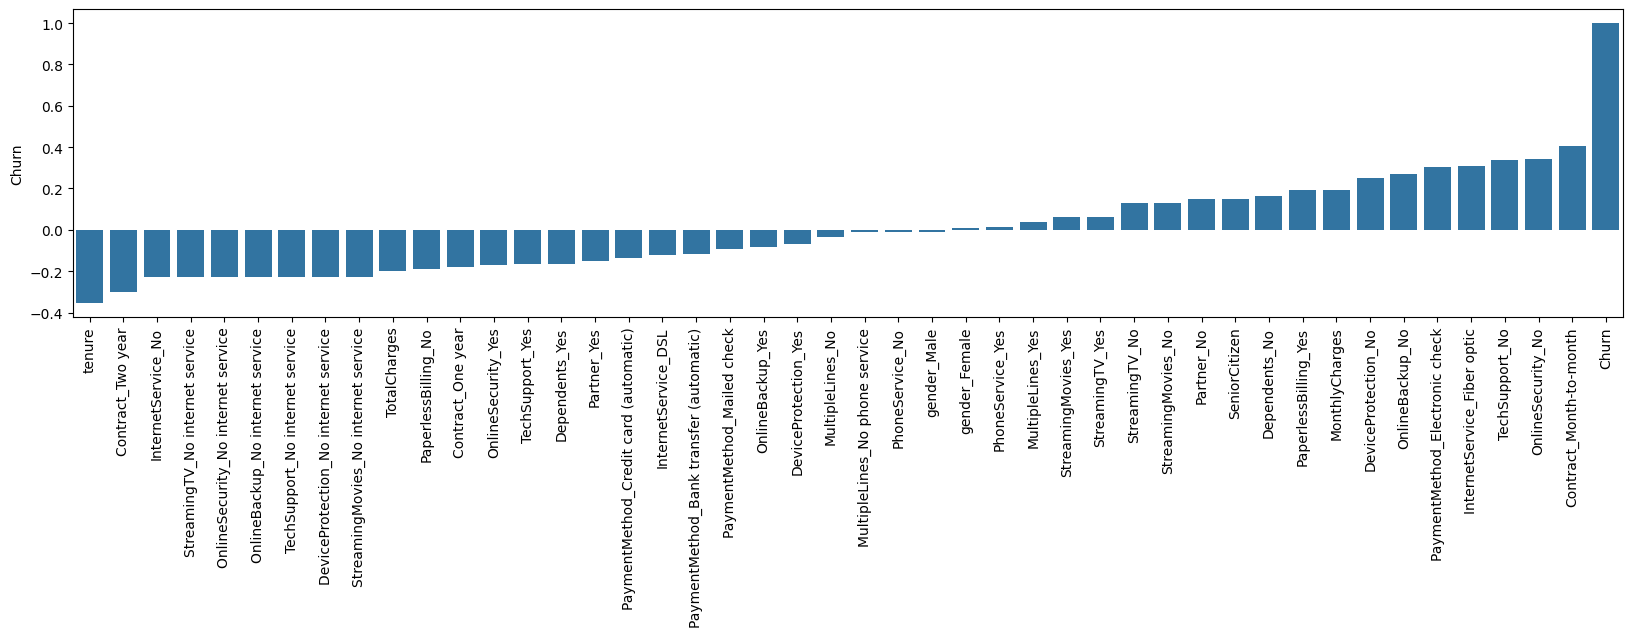

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
corr = df2.corr()['Churn'].sort_values(ascending = True)
sns.barplot(data= corr)
plt.xticks(rotation = 90);

* Por medio de un análisis visual de que es lo que significa cada variable nos quedaremos con todas ya que asumimos no existe multicolinealidad.

* Debido a que tenemos muchas columnas y con distintas escalas de datos, se decide estandarizar.

* Generaremos dos formas de escalar para ver las diferencias y cual es la mas apropiada según el caso.

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df2_sc = sc.fit_transform(df2)
df2_sc = pd.DataFrame(data = df2_sc, columns = df2.columns)
df2_sc

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,-0.601663,1.009430,-1.009430,-1.035617,1.035617,0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,-0.601663,-0.990658,0.990658,0.965608,-0.965608,0.652305,...,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,1.662059,-0.990658,0.990658,0.965608,-0.965608,0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,-0.601663,-0.990658,0.990658,0.965608,-0.965608,0.652305,...,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,1.662059,1.009430,-1.009430,0.965608,-0.965608,0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,-0.601663,-0.990658,0.990658,-1.035617,1.035617,-1.533025,...,1.254943,-1.107895,1.943495,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576
7028,-0.440327,1.612573,1.276493,2.241056,-0.601663,1.009430,-1.009430,-1.035617,1.035617,-1.533025,...,1.254943,-1.107895,1.943495,-0.561364,-0.828939,0.828939,-0.529976,1.903490,-0.711863,-0.543604
7029,-0.440327,-0.872808,-1.170004,-0.854514,-0.601663,1.009430,-1.009430,-1.035617,1.035617,-1.533025,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
7030,2.271039,-1.158016,0.319168,-0.872095,1.662059,-0.990658,0.990658,-1.035617,1.035617,0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576


In [15]:
from sklearn.preprocessing import MinMaxScaler

MinMax = MinMaxScaler()
df2_MM = MinMax.fit_transform(df2)
df2_MM = pd.DataFrame(data = df2_MM, columns = df2.columns)
df2_MM

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Consideraciones para Escalar Datos Dummy

### Naturaleza de los Datos:
Los datos transformados por pd.get_dummies son binarios y, por lo tanto, ya están en una escala uniforme (0, 1). Esto significa que técnicamente ya están normalizados a un rango común.

### Uso de StandardScaler:
No generalmente recomendado: StandardScaler transformará los valores binarios de tal manera que la media será 0 y la desviación estándar 1. Dado que los valores son 0 y 1, aplicar StandardScaler podría no ser beneficioso y puede hacer que los valores no sean intuitivos, alejándolos de su representación binaria original. Además, podría distorsionar la interpretación directa de los coeficientes en modelos lineales.

### Uso de MinMaxScaler:
Poco o ningún beneficio: Dado que MinMaxScaler escala los valores entre un rango definido (típicamente 0 a 1, el rango ya utilizado para los datos dummy), aplicar este escalador a los datos dummy no alterará sus valores. Por lo tanto, usar MinMaxScaler en datos one-hot es redundante.

**Nos quedaremos con MinMaxScaled ya que no altera los valores dummies (de por si estan estandarizados) y estandariza el resto de los valores que no son dummies**

# Entrenamiento del modelo

In [16]:
X = df2_MM.drop('Churn', axis = 1)
y = df2_MM['Churn'].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.795734597156398

# Evaluacion del modelo

In [22]:
model.predict_proba(X_test)

array([[0.99021183, 0.00978817],
       [0.86177511, 0.13822489],
       [0.30193071, 0.69806929],
       ...,
       [0.99028272, 0.00971728],
       [0.70132412, 0.29867588],
       [0.8286526 , 0.1713474 ]])

Basicamente obtenemos la probabilidad de que sea 0 (0.99021183) y luego probabilidad de que sea 1 (0.00978817)

In [23]:
model.coef_

array([[ 2.16455763e-01, -3.10072227e+00, -1.62260486e-01,
         1.19637145e+00,  9.33954534e-04, -2.24830670e-02,
        -7.15001712e-02,  4.99510588e-02,  1.16803878e-01,
        -1.38352991e-01,  8.51114164e-02, -1.06660529e-01,
        -1.58856415e-01,  8.51114164e-02,  5.21958861e-02,
        -4.17811410e-01,  5.11402455e-01, -1.15140157e-01,
         2.40088586e-01, -1.15140157e-01, -1.46497541e-01,
         8.40744700e-02, -1.15140157e-01,  9.51657506e-03,
         5.65171881e-02, -1.15140157e-01,  3.70738570e-02,
         2.20213883e-01, -1.15140157e-01, -1.26622838e-01,
        -8.59224895e-02, -1.15140157e-01,  1.79513535e-01,
        -8.76648200e-02, -1.15140157e-01,  1.81255865e-01,
         7.42704039e-01, -9.75399724e-02, -6.66713179e-01,
        -1.13994673e-01,  9.24455610e-02, -2.72797552e-03,
        -1.58701362e-01,  2.16922747e-01, -7.70425223e-02]])

El coeficiente positivo ayuda a predecir 1 y ek coeficiente negativo ayuda a predecir 0

<Axes: >

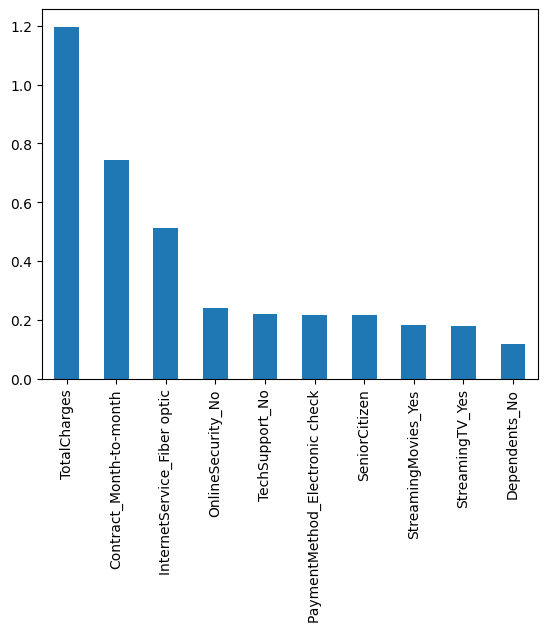

In [26]:
weights = pd.Series(model.coef_[0], index = X.columns)

weights.sort_values(ascending = False)[:10].plot(kind = 'bar')


<Axes: >

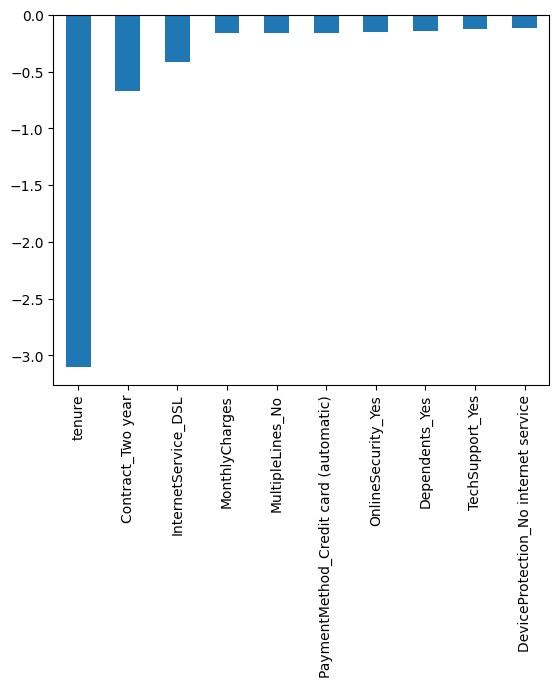

In [27]:
weights.sort_values(ascending = True)[:10].plot(kind = 'bar')

En el grafico anterior muestra la importancia que tienen las features al momento de generar una predicción.

TotalCharges pesa mucho al momento de predecir 1 y Tenure pesa mucho al momento de predecir 0.

<Figure size 100x100 with 0 Axes>

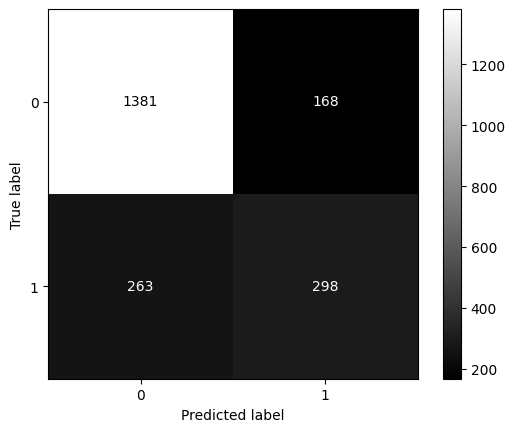

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize = (1,1))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay( confusion_matrix = cm).plot(cmap = 'gray')
plt.show()


El acuracci en realidad lo que hace es sumar los valores que predije bien sobre el total de valores, por lo que en este caso deberia haber sumado 1381+298

In [41]:
#Acuracci calculado
(1381+298)/ (1381+298+263+168)

0.795734597156398

# Concepto: Regresión Logística Multinomial

* **La regresión logística multinomial** es un algoritmo de clasificación utilizado para predecir la probabilidad de múltiples clases en un problema de clasificación. Utiliza la función logística para modelar la relación entre las variables independientes y las clases.

* **Técnica: One vs Rest (Uno contra el resto)** One vs Rest es una técnica utilizada en la regresión logística multinomial. Consiste en entrenar un clasificador binario para cada clase, distinguiendo esa clase de todas las demás.

* **Modelo: Clasificadores Logísticos Multinomiales** Los clasificadores logísticos multinomiales son modelos de clasificación utilizados para problemas con más de dos categorías posibles. Estos modelos emplean la función softmax para calcular las probabilidades de pertenencia a cada clase.

* **Conceptos Adicionales: Logits y Softmax** Los logits son los valores resultantes de aplicar el modelo de regresión logística antes de la función softmax. Representan la evidencia a favor de cada clase. Softmax es una función que convierte los logits en probabilidades, asegurando que la suma de todas las probabilidades sea igual a uno.

* **Métrica de Evaluación: Entropía Cruzada (Cross Entropy)** La entropía cruzada es una métrica utilizada para evaluar la diferencia entre la distribución de probabilidad predicha por el modelo y la distribución de probabilidad real. Es comúnmente utilizada como función de pérdida en problemas de clasificación.

* **Algoritmos de Optimización: Solvers en scikit-learn** Los solvers en scikit-learn son algoritmos utilizados para ajustar los parámetros de los modelos de regresión logística. Buscan minimizar la función de pérdida, como la entropía cruzada, para encontrar los coeficientes óptimos del modelo.

# Solvers
En el contexto de la regresión logística y otros modelos de aprendizaje automático, los "solvers" (solucionadores) son algoritmos que se utilizan para encontrar los parámetros del modelo que minimizan la función de costo. La elección del solver puede afectar el rendimiento y la velocidad de convergencia del modelo. Algunos solvers comunes incluyen:

* Newton-CG (newton-cg): Utiliza el método de Newton para la optimización. Es eficaz para conjuntos de datos pequeños, pero puede ser costoso en términos computacionales para conjuntos de datos grandes.
* LBFGS (lbfgs): Utiliza el método de optimización de BFGS (Broyden-Fletcher-Goldfarb-Shanno). Es adecuado para conjuntos de datos grandes y suele ser más rápido que Newton-CG.
* Liblinear (liblinear): Es un solver de optimización para problemas de clasificación binaria. Es eficiente para conjuntos de datos grandes y es una buena opción cuando se trabaja con datos linealmente separables.
* SAG (saga): Utiliza el método de promedio estocástico de gradiente (Stochastic Average Gradient). Es eficiente para grandes conjuntos de datos y, en particular, para problemas con muchos ejemplos y características.

Estos solvers son opciones implementadas en bibliotecas como scikit-learn en Python. La elección del solver dependerá del tamaño de tu conjunto de datos, la naturaleza del problema y los recursos computacionales disponibles. Es recomendable probar varios solvers y ajustar otros parámetros del modelo para encontrar la configuración que mejor se adapte a tu caso específico.